### Basic graph theory using networkx package
Summary of notebooks from *Introduction to Graph Theory* coursera course

In [4]:
# Required packages
import networkx as nx # To work with networks
import matplotlib.pyplot as plt

print('Networkx version:',nx.__version__)

Networkx version: 2.4


### Sample graph and layouts

In [5]:
# Create a directed graph
G = nx.DiGraph()

#Add edges
G.add_edge("a","b")
G.add_edge("b", "c")
G.add_edge("c", "d")
G.add_edge("d", "e")
G.add_edge("e", "c")
G.add_edge("a", "d")

In [6]:
# Find degree of its nodes
print('Degree:',G.degree())
print('In-degree:',G.in_degree())
print('Out-degree:',G.out_degree())

Degree: [('a', 2), ('b', 2), ('c', 3), ('d', 3), ('e', 2)]
In-degree: [('a', 0), ('b', 1), ('c', 2), ('d', 2), ('e', 1)]
Out-degree: [('a', 2), ('b', 1), ('c', 1), ('d', 1), ('e', 1)]


In [7]:
# See networkx docs
# Define different layouts
circ = nx.circular_layout(G)
planar = nx.planar_layout(G)
shell = nx.shell_layout(G)
rand = nx.random_layout(G)

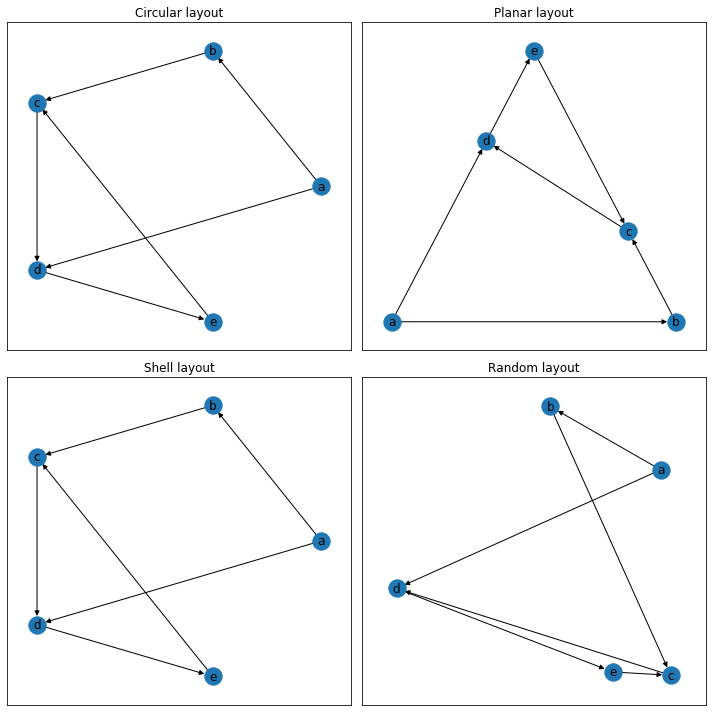

In [8]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot('221', title = 'Circular layout')
ax2 = plt.subplot('222', title = 'Planar layout')
ax3 = plt.subplot('223', title = 'Shell layout')
ax4 = plt.subplot('224', title = 'Random layout')
nx.draw_networkx(G, pos = circ, ax = ax1)
nx.draw_networkx(G, pos = planar, ax = ax2)
nx.draw_networkx(G, pos = shell, ax = ax3)
nx.draw_networkx(G, pos = rand, ax = ax4)
plt.tight_layout()

### Connected components  
(Only valid for un-directed graphs)

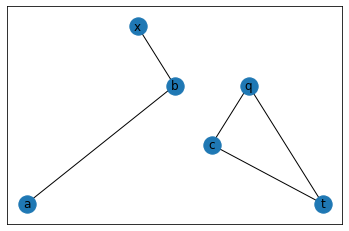

In [9]:
G_cc = nx.Graph()
G_cc.add_edges_from([('a', 'b'), ('t', 'c'), ('b', 'x'), ('c', 'q'), ('q', 't')])
nx.draw_networkx(G_cc, pos = nx.planar_layout(G_cc))

In [10]:
print('Is graph connected?',nx.is_connected(G_cc))
print('No. of connected components:',nx.number_connected_components(G_cc))

Is graph connected? False
No. of connected components: 2


In [11]:
# nx.connected_components(G) returns dictionary of labels of 
# each connected component

conn_comp = [g for g in sorted(nx.connected_components(G_cc), key = len, reverse = True)]
print('Connected components')
for i in conn_comp: print(i)

Connected components
{'a', 'b', 'x'}
{'t', 'c', 'q'}


### Guarani puzzle

In [12]:
# Configuration '********' with * replaced by B or W for respective knights
import itertools as it

G = nx.Graph()

# Create all possible configurations and add as nodes
for indices in it.permutations(range(8),4):
    conf = ['*']*8
    conf[indices[0]] = 'W'
    conf[indices[1]] = 'W'
    conf[indices[2]] = 'B'
    conf[indices[3]] = 'B'
    G.add_node(''.join(conf))

# Enumerating moves for every node
moves = [[] for _ in range(8)]
moves[0] = [4, 6]
moves[1] = [5, 7]
moves[2] = [3, 6]
moves[3] = [2, 7]
moves[4] = [0, 5]
moves[5] = [1, 4]
moves[6] = [0, 2]
moves[7] = [1, 3]

# For every configuration, for every possible move for that configuration,
# add an edge to the graph
for node in G.nodes():
    configuration = [c for c in node]
    
    for i in range(8):
        if configuration[i] != '*':
            for new_pos in moves[i]:
                if configuration[new_pos] != '*':
                    continue
                new_configuration = list(configuration) # list() is important! If not, changing dict size while iterating through loop shows up
                new_configuration[i] = '*'
                new_configuration[new_pos] = configuration[i]
                if not G.has_edge(''.join(configuration),''.join(new_configuration)):
                    G.add_edge(''.join(configuration),''.join(new_configuration))
                    
print('Number of nodes:',len(G.nodes()))
print('Number of edges:',len(G.edges()))
print('Number of connected components:',nx.number_connected_components(G))

Number of nodes: 420
Number of edges: 960
Number of connected components: 2


The 2 components refer to 2 configurations (white and black consecutive or alternative) that are independent of each other and never cross configuration

In [13]:
start_conf = "W*W**B*B"
end_conf = "B*B**W*W"
if end_conf in nx.node_connected_component(G, start_conf):
    print(' -> '.join(nx.shortest_path(G, start_conf, end_conf)))
else: print('Not possible to reach the end configuration from the start configuration')

W*W**B*B -> WBW**B** -> WBW*B*** -> *BW*B*W* -> BBW***W* -> B*W**BW* -> B*W*B*W* -> B**WB*W* -> B*WWB*** -> **WWB*B* -> B*WW**B* -> B*W***BW -> BWW***B* -> BW*W**B* -> BWBW**** -> BWB****W -> B*B**W*W


### Topological sorting of DAGs

Topological ordering: ['a', 'b', 'd', 'c']


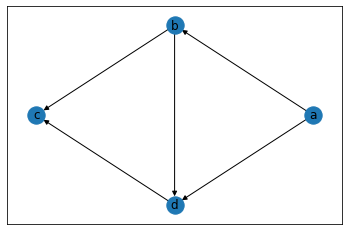

In [14]:
G = nx.DiGraph()
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('d', 'c'), ('a', 'd')])
nx.draw_networkx(G, pos = nx.circular_layout(G))

if(nx.is_directed_acyclic_graph(G)):
    print("Topological ordering:",list(nx.topological_sort(G)))

### Strongly connected components for DAGs

Strongly connected componnets: [{'c'}, {'d'}, {'a', 'b', 'f'}, {'e'}]


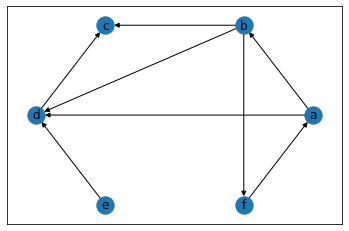

In [15]:
G = nx.DiGraph()
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('d', 'c'), ('a', 'd'), ('e', 'd'), ('f', 'a'), ('b', 'f')])
nx.draw_networkx(G, pos = nx.circular_layout(G))
print("Strongly connected componnets:",list(nx.strongly_connected_components(G)))

### Eulerian cycles
(Visits every edge exactly once and ends on same vertex)

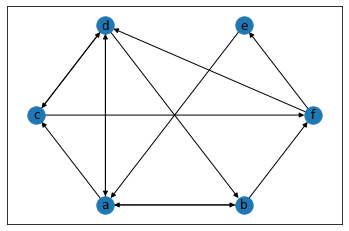

In [16]:
G = nx.DiGraph([('f', 'e'), ('d', 'c'), ('a', 'b'), ('c', 'd'), ('c', 'f'), ('f', 'd'), ('b', 'a'), ('a', 'd'), ('d', 'a'), ('e', 'a'), ('b', 'f'), ('a', 'c'), ('d', 'b')])
nx.draw_networkx(G, pos = nx.circular_layout(G))

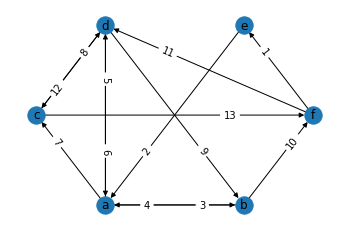

In [17]:
# If G is Eulerian, label the edges with edge number as a dictionary
if(nx.is_eulerian(G)):
    cycle = list(nx.eulerian_circuit(G))
    edge_number = 1
    labels = {}
    for edge in cycle:
        labels[edge] = str(edge_number)
        edge_number += 1

# Use plt.figure() to avoid printing of labels
plt.figure()
nx.draw_networkx(G, pos = nx.circular_layout(G))
nx.draw_networkx_edge_labels(G, pos = nx.circular_layout(G),\
                             edge_labels = labels,\
                             label_pos=0.3) # offset to avoid labels overlap
plt.axis('off')
plt.show()

### Minimum spanning tree
(Find tree joining all nodes with minimum total weight)

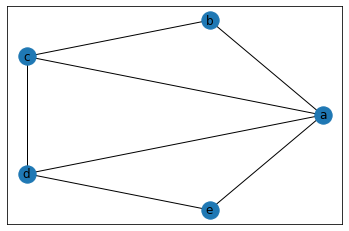

In [18]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b', {'weight':2, 'label': 2}), 
        ('a', 'c', {'weight':3, 'label': 3}), 
        ('a', 'd', {'weight':1, 'label': 1}), 
        ('a', 'e', {'weight':3, 'label': 3}), 
        ('b', 'c', {'weight':4, 'label': 4}), 
        ('c', 'd', {'weight':5, 'label': 5}), 
        ('d', 'e', {'weight':4, 'label': 4}), 
        ('e', 'a', {'weight':1, 'label': 1})
    ])
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos = pos)

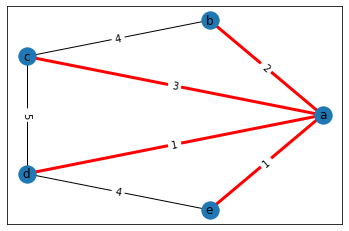

In [19]:
labels = {}
for edge in G.edges:
    labels[edge] = G.get_edge_data(edge[0], edge[1])['label']

# Find MST
T = nx.minimum_spanning_tree(G)

# Plot
plt.figure()
nx.draw_networkx(G, pos = nx.circular_layout(G))
nx.draw_networkx_edges(G, pos = nx.circular_layout(G), edgelist = T.edges,\
                       width = 3,\
                       edge_color = 'red')
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = labels)
plt.show()

### Maximal matching in a bipartite graph

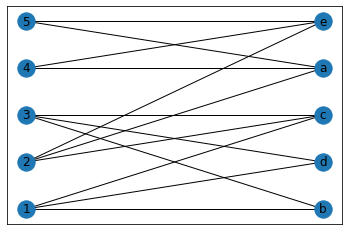

In [20]:
G = nx.Graph()
G.add_edges_from([(1, 'b'), (1, 'c'), (1, 'd'), (2, 'a'), (2, 'c'), (2, 'e'), (3, 'b'),
                  (3, 'c'), (3, 'd'), (4, 'a'), (4, 'e'), (5, 'a'), (5, 'e')])
pos = nx.bipartite_layout(G, nodes = nx.bipartite.sets(G)[0])
nx.draw_networkx(G, pos = pos)

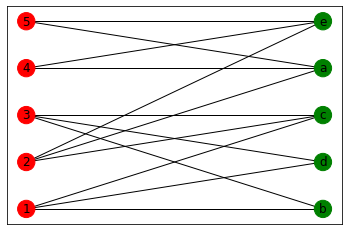

In [21]:
if nx.bipartite.is_bipartite(G):
    left, right = nx.bipartite.sets(G)
    vertex_colors = []
    for node in G.nodes():
        if(node in left): vertex_colors.append('red')
        elif(node in right): vertex_colors.append('green')
        else: vertex_colors.append('black')
nx.draw_networkx(G, pos = pos, node_color = vertex_colors)

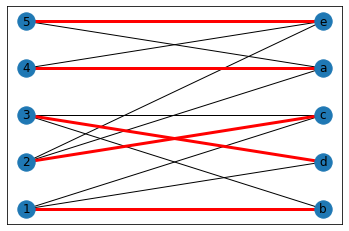

In [22]:
# Find maximal matching. Returns set of edges
M = nx.maximal_matching(G)

plt.figure()
nx.draw_networkx(G, pos = pos)
nx.draw_networkx_edges(G, pos = pos, edgelist = M,\
                       width = 3,\
                       edge_color = 'red')
plt.show()

### Maximum Clique
(A connected component where each vertex is connected to every other vertex in the clique)

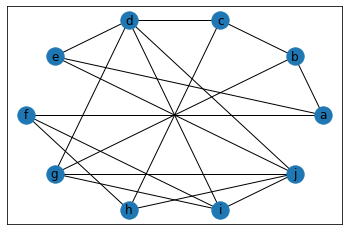

In [23]:
G = nx.Graph()
G.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('e', 'a'),\
                  ('f', 'a'), ('g', 'b'), ('h', 'c'), ('i', 'd'), ('j', 'e'),\
                  ('f', 'h'), ('h', 'j'), ('j', 'g'), ('g', 'i'), ('i', 'f'),\
                  ('j', 'i'), ('j', 'd'), ('d', 'g')])
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos = pos)

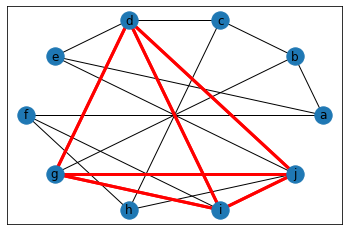

In [24]:
cliques = nx.find_cliques(G)
# Find maximum clique among all cliques
max_clique_size = 0
for clique in cliques:
    if(len(clique) > max_clique_size):
        max_clique_size = len(clique)
        max_clique = clique

# Find maximum clique's edges for coloring
clique_edges = []
for vertex1 in max_clique:
    for vertex2 in max_clique:
        if(vertex1 != vertex2):
            clique_edges.append((vertex1, vertex2))

# Plot
plt.figure()
nx.draw_networkx(G, pos = pos)
nx.draw_networkx_edges(G, pos = nx.circular_layout(G), edgelist = clique_edges,\
                       width = 3,\
                       edge_color = 'red')
plt.show()